In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance_modified.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [6]:
df['math score']=pd.to_numeric(df['math score'],errors="coerce")

In [7]:
df['math score']

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

In [9]:
df['math score'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [11]:
df['math score'].fillna(df['math score'].mean(),inplace=True)

In [12]:
df['math score'].isna().sum()

0

In [13]:
df['reading score'].isna().sum()

6

In [14]:
df['reading score'].fillna(df['reading score'].mean(),inplace=True)

In [15]:
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

<Axes: >

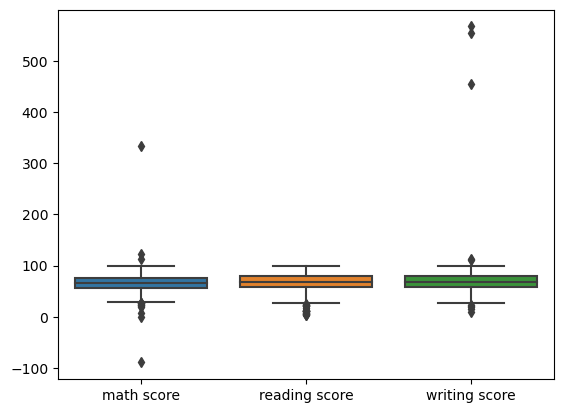

In [17]:
sns.boxplot(df[['math score','reading score','writing score']])

In [18]:
q1=df.quantile(0.25,numeric_only=True)
q3=df.quantile(0.75,numeric_only=True)
IQR=q3-q1
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)

In [19]:
ll

math score       28.5
reading score    26.5
writing score    26.5
dtype: float64

In [20]:
ul

math score       104.5
reading score    110.5
writing score    110.5
dtype: float64

In [21]:
group=df[['math score','reading score','writing score']]

In [22]:
outlier_mask=np.any((group<ll) | (group>ul),axis=1)

<Axes: >

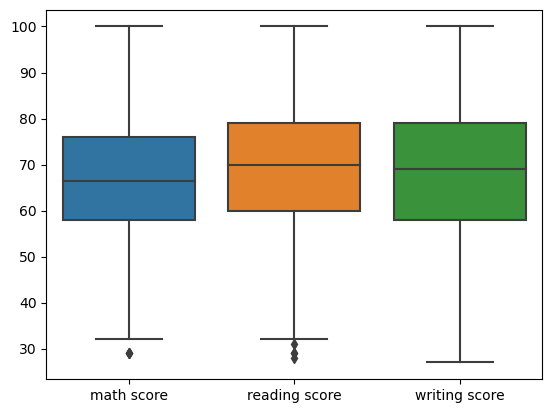

In [23]:
sns.boxplot(df[~outlier_mask])

In [24]:
sum(df['math score'] < 28.5)

11

In [26]:
group[~outlier_mask]['math score']

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 960, dtype: float64

In [27]:
group=group[~outlier_mask]

<Axes: xlabel='math score', ylabel='Count'>

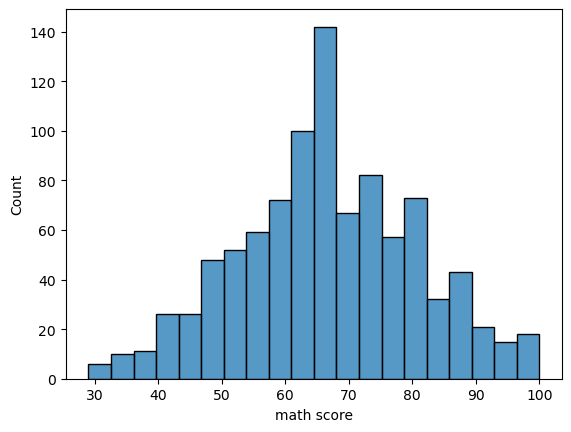

In [28]:
sns.histplot(group['math score'])

In [31]:
q1=group.quantile(0.25,numeric_only=True)
q3=group.quantile(0.75,numeric_only=True)
IQR=q3-q1
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)

In [32]:
ul

math score       103.0
reading score    107.5
writing score    110.5
dtype: float64

In [33]:
ll

math score       31.0
reading score    31.5
writing score    26.5
dtype: float64

<Axes: >

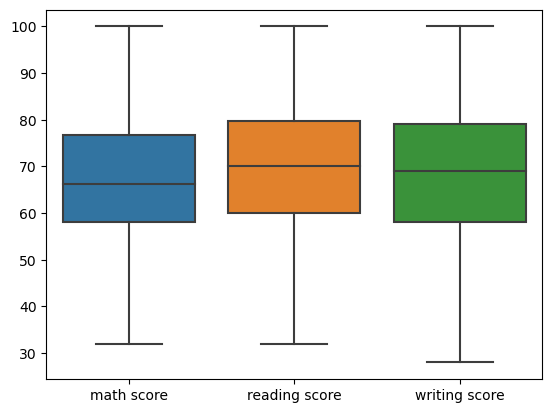

In [38]:
outlier_mask=np.any((group<ll) | (group>ul),axis=1)
sns.boxplot(group[~outlier_mask])

In [35]:
outlier_mask

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 960, dtype: bool

<Axes: >

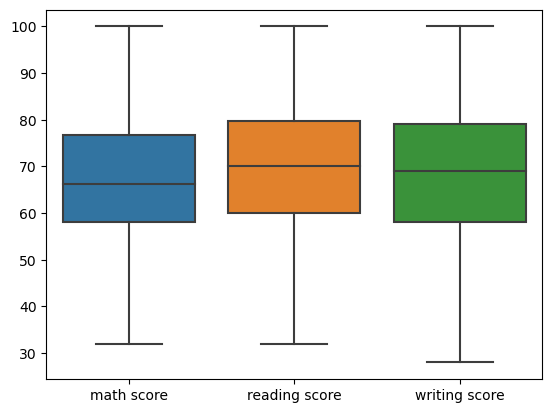

In [39]:
sns.boxplot(group[~outlier_mask])

In [40]:
group[outlier_mask]

,math score,reading score,writing score
211,35.0,28.0,27.0
528,29.0,41.0,47.0
601,29.0,29.0,30.0
683,29.0,40.0,44.0
810,51.0,31.0,36.0
896,36.0,29.0,27.0


In [41]:
group['math score'][(group['math score']) < ll['math score']] = group['math score'].median()

In [42]:
group['math score'][(group['math score'] < ll['math score'])]

Series([], Name: math score, dtype: float64)

In [43]:
group['reading score'][(group['reading score'] < ll['reading score'])] = group['reading score'].median()

In [44]:
group['writing score'][(group['writing score'] < ll['writing score'])] = group['writing score'].median() 

<Axes: >

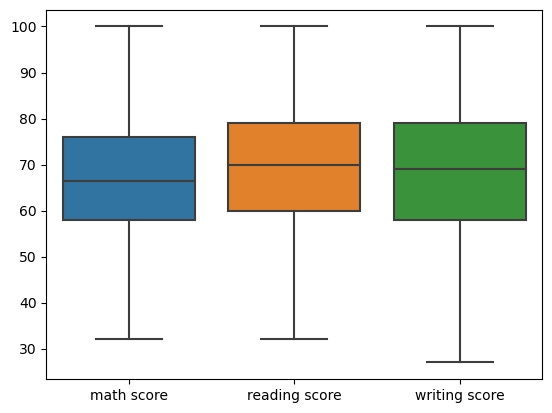

In [46]:
sns.boxplot(group)